In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("house_price.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
num_cols=df.select_dtypes(include=["int","float"])
num_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
num_cols=df.select_dtypes(include=["object"])
num_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
df_null=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=["null%"])
df_null.reset_index(drop=False,inplace=True)
df_null.rename(columns={"index":"columns"},inplace=True)

In [8]:
df_null

,columns,null%
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000
...,...,...
76,MoSold,0.000000
77,YrSold,0.000000
78,SaleType,0.000000
79,SaleCondition,0.000000


In [9]:
df_null[df_null["null%"]>40]

,columns,null%
6,Alley,93.767123
57,FireplaceQu,47.260274
72,PoolQC,99.520548
73,Fence,80.753425
74,MiscFeature,96.301370


In [10]:
df_null[df_null["null%"]>40]["columns"]

6           Alley
57    FireplaceQu
72         PoolQC
73          Fence
74    MiscFeature
Name: columns, dtype: object

In [11]:
l1=df_null[df_null["null%"]>40]["columns"]
l1

6           Alley
57    FireplaceQu
72         PoolQC
73          Fence
74    MiscFeature
Name: columns, dtype: object

In [12]:
df.drop(l1,axis=1,inplace=True)

In [13]:
df.drop(["Id"],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [15]:
df_null[df_null["null%"]<4].index


Int64Index([ 0,  1,  2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 61, 62, 65, 66, 67, 68, 69, 70, 71, 75, 76, 77, 78,
            79, 80],
           dtype='int64')

In [16]:
df_null[(df_null["null%"]>4)&(df_null["null%"]<40)]

,columns,null%
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945


In [17]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [19]:
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])

In [20]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean())

In [21]:
df["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

In [22]:
df["GarageQual"]=df["GarageQual"].fillna(df["GarageQual"].mode()[0])

In [23]:
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.isnull().sum()/len(df)*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

In [46]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,...,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,56.851983,3.031870,70.123612,10536.987252,0.995751,1.924929,2.775496,0.000708,3.013456,0.063739,...,22.019122,3.398017,15.572946,2.852691,41.284703,6.323654,2007.809490,7.509915,3.771246,182507.021955
std,42.309163,0.633108,22.283195,10113.840927,0.065071,1.414224,0.710273,0.026612,1.625615,0.279545,...,61.192453,29.432240,56.627468,40.851699,494.856654,2.707981,1.327289,1.557056,1.106361,79270.416057
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7572.750000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,131475.000000
50%,50.000000,3.000000,70.049958,9500.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,164600.000000
75%,70.000000,3.000000,79.000000,11618.250000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


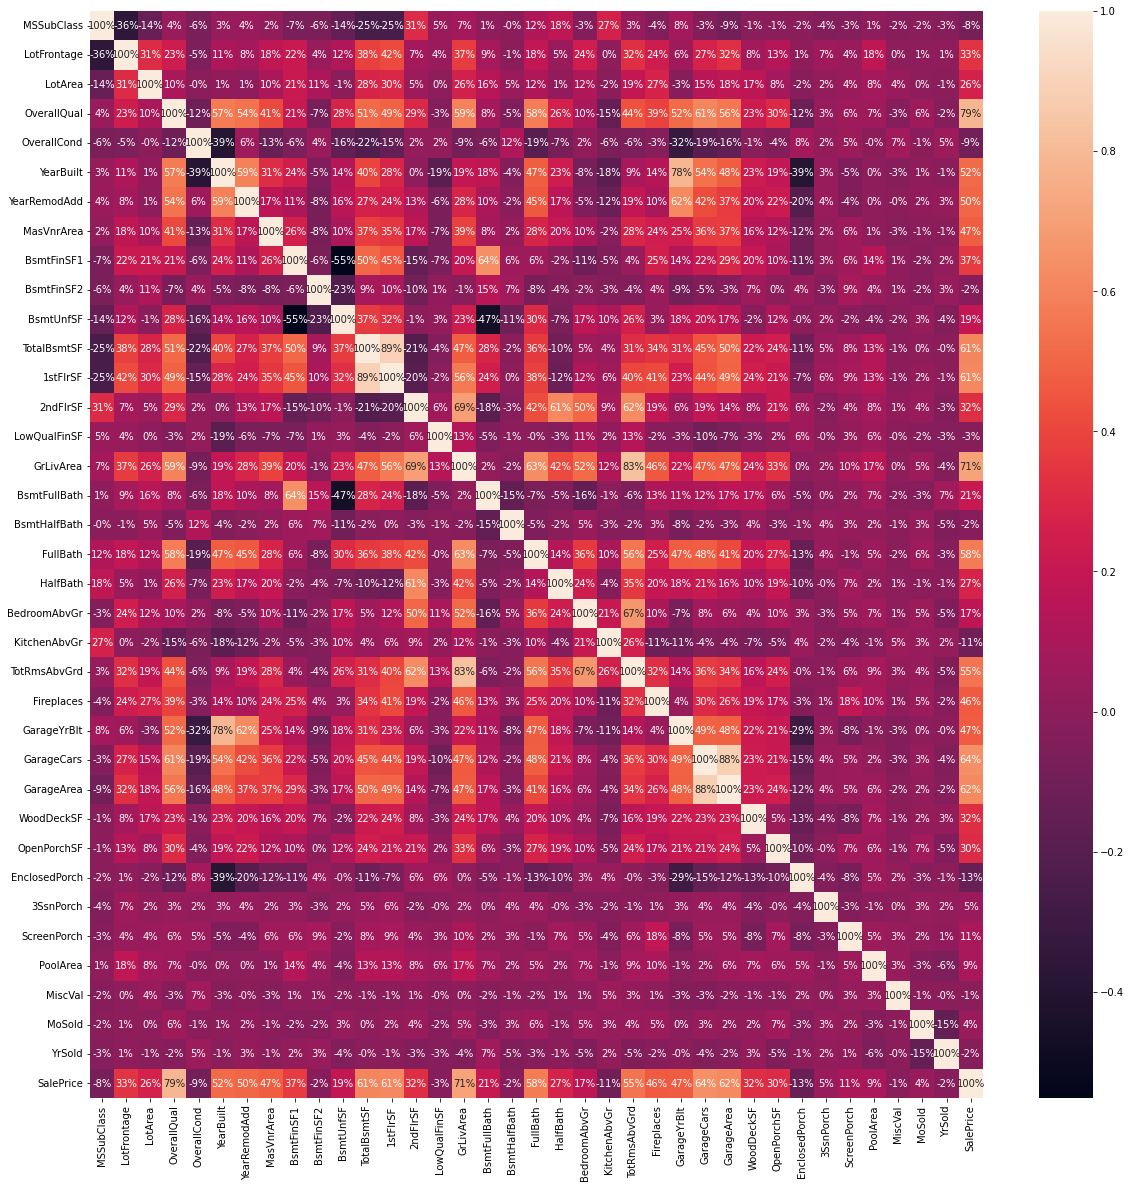

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [27]:
X=df[["GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF","TotalBsmtSF","OverallQual"]]

In [28]:
Y=df.iloc[:,-1]

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [30]:
for i in df:
    if df[i].dtype=="O":
        df[i]=le.fit_transform(df[i])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=45)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_train_pred=reg.predict(X_train)
Y_test_pred=reg.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_train,Y_train_pred)),2))
print("R2 Score:",round(r2_score(Y_train,Y_train_pred),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_test_pred)),2))
print("R2 Score:",round(r2_score(Y_test,Y_test_pred),2))

Train Data
RMSE: 38888.01
R2 Score: 0.75
Test Data
RMSE: 39417.98
R2 Score: 0.79


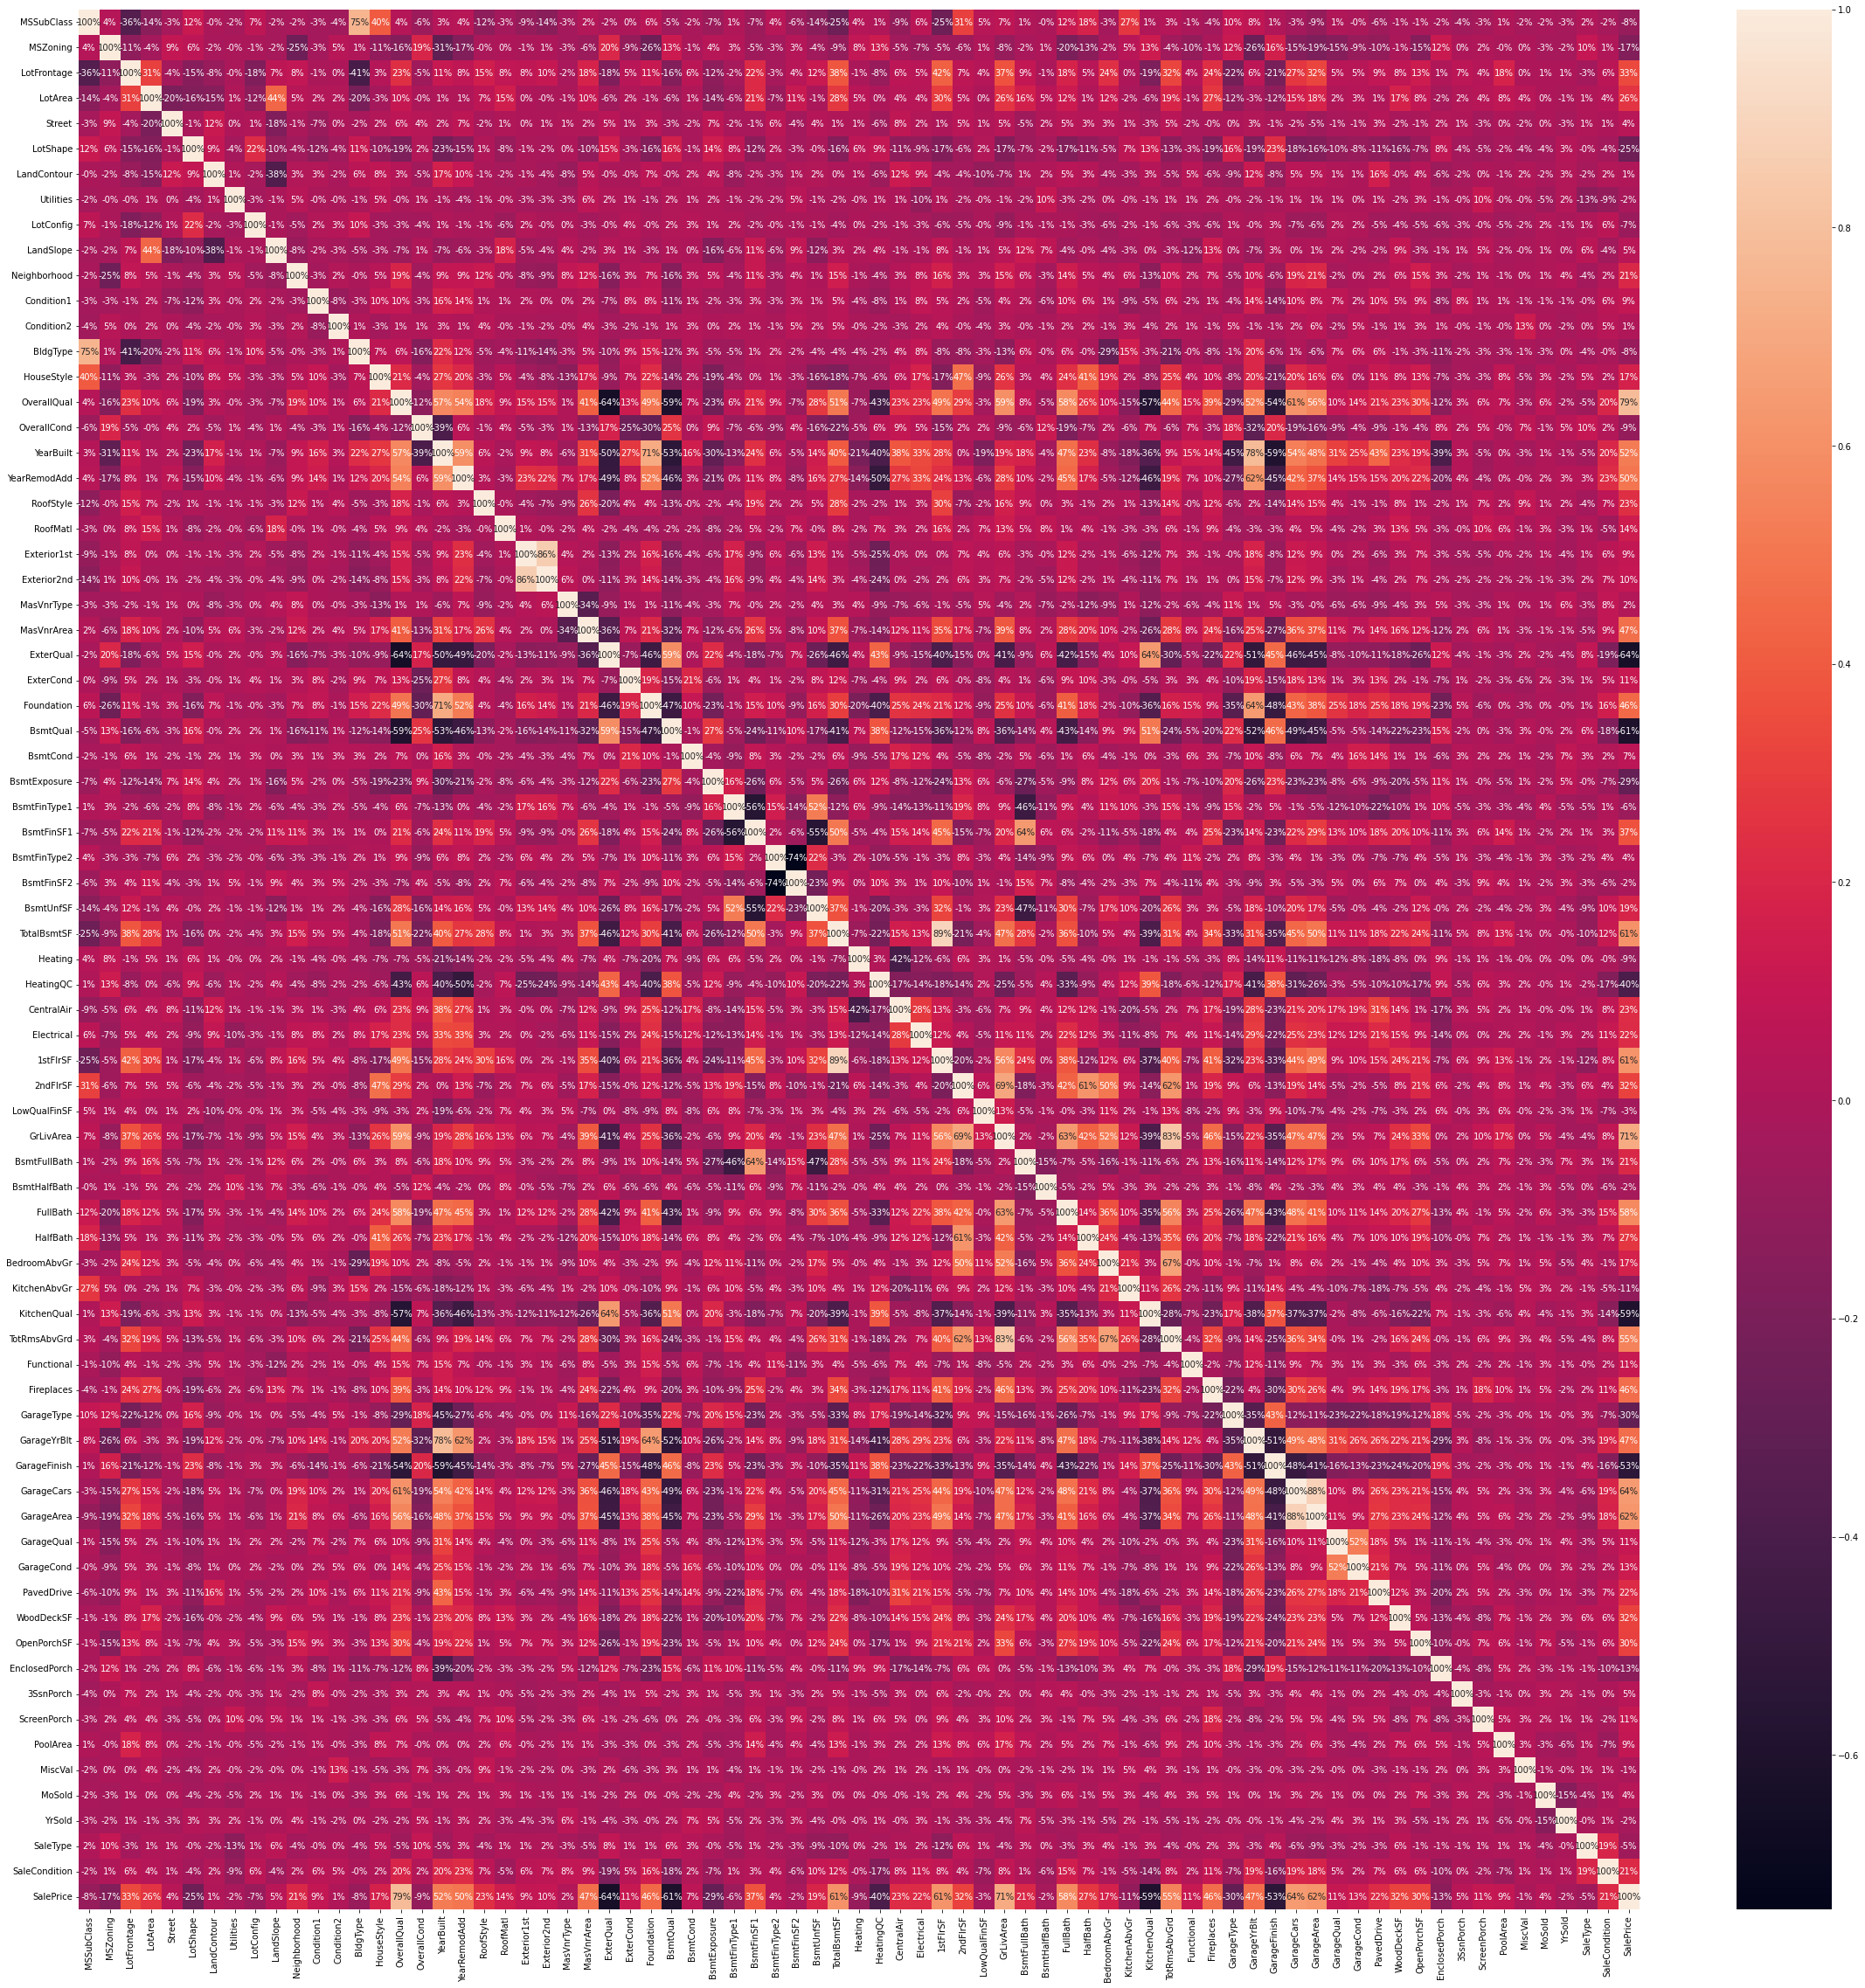

In [38]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [39]:
X2=df[["GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF","TotalBsmtSF","OverallQual","GarageFinish","KitchenQual","YearBuilt","YearRemodAdd","BsmtQual","ExterQual","MasVnrArea","HeatingQC","Fireplaces","GarageYrBlt"]]

In [40]:
X2

,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,OverallQual,GarageFinish,KitchenQual,YearBuilt,YearRemodAdd,BsmtQual,ExterQual,MasVnrArea,HeatingQC,Fireplaces,GarageYrBlt
0,548,2,8,2,1710,856,856,7,1,2,2003,2003,2,2,196.0,0,0,2003.0
1,460,2,6,2,1262,1262,1262,6,1,3,1976,1976,2,3,0.0,0,1,1976.0
2,608,2,6,2,1786,920,920,7,1,2,2001,2002,2,2,162.0,0,1,2001.0
3,642,3,7,1,1717,961,756,7,2,2,1915,1970,3,3,0.0,2,1,1998.0
4,836,3,9,2,2198,1145,1145,8,1,2,2000,2000,2,2,350.0,0,1,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,2,7,2,1647,953,953,6,1,3,1999,2000,2,3,0.0,0,1,1999.0
1456,500,2,7,2,2073,2073,1542,6,2,3,1978,1988,2,3,119.0,4,2,1978.0
1457,252,1,9,2,2340,1188,1152,7,1,2,1941,2006,3,0,0.0,0,2,1941.0
1458,240,1,5,1,1078,1078,1078,5,2,2,1950,1996,3,3,0.0,2,0,1950.0


In [41]:
Y2=df.iloc[:,-1]

In [42]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.20,random_state=33)

In [43]:
reg.fit(X2_train,Y2_train)

LinearRegression()

In [44]:
Y2_train_pred=reg.predict(X2_train)
Y2_test_pred=reg.predict(X2_test)

In [45]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y2_train,Y2_train_pred)),2))
print("R2 Score:",round(r2_score(Y2_train,Y2_train_pred),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y2_test,Y2_test_pred)),2))
print("R2 Score:",round(r2_score(Y2_test,Y2_test_pred),2))

Train Data
RMSE: 35362.26
R2 Score: 0.8
Test Data
RMSE: 35392.82
R2 Score: 0.82
